In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import datetime
import re
import cvxpy as cp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = "/content/drive/My Drive/AMS Smart Energy/data/HomeB-meter1_2014.csv"
df_meter = pd.read_csv(path, float_precision='round_trip')

In [140]:
df_meter.shape

(17520, 18)

In [0]:
df_meter.drop_duplicates('Date & Time', inplace = True)
df_meter['Date & Time'] = pd.to_datetime(df_meter['Date & Time'])

In [158]:
df_meter.loc[df_meter['Date & Time'] == '2014-01-11 00:30:00']

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
14591,2014-01-11 00:30:00,0.508599,0,0.508599,0.000022,0.009703,0.006969,0.00031,0.003818,0.002391,0.005061,0.052286,0.00006,0.000234,0.0,0.0,0.0,0.0


In [159]:
df_meter = df_meter['use [kW]']
df_meter=df_meter[14591:(14591+672)]
len(df_meter)

672

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [21, 10] 

def plot_graph_offline(prov_type, x):
  plt.title("Offline " + prov_type + " provisioning")
  plt.plot(x, 'g', label="Optimal Values")
  plt.plot(df_meter, label="True Values")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.ylabel("Units in kW")
  plt.xlabel("time")

In [0]:
def offline_static_provision(df):
  p = 0.4
  a = 4
  b = 4
  y = df.to_list()
  x = cp.Variable(1)

  equation = p*x + a*cp.maximum(0, y - x)
  objective = cp.Minimize(cp.sum(equation) + b*x)
  constraints = [0 <= x]
  problem = cp.Problem(objective, constraints)
  result = problem.solve()

  # Print result.
  print("\nThe optimal value is", result)
  print("The optimal x is")
  print(x.value)
  #return pd.DataFrame(data=x, index=df.index, dtype='float')
  plot_graph_offline('static', pd.Series(np.full((672), x.value), index=df.index))


The optimal value is 388.62740711382355
The optimal x is
[0.90273111]


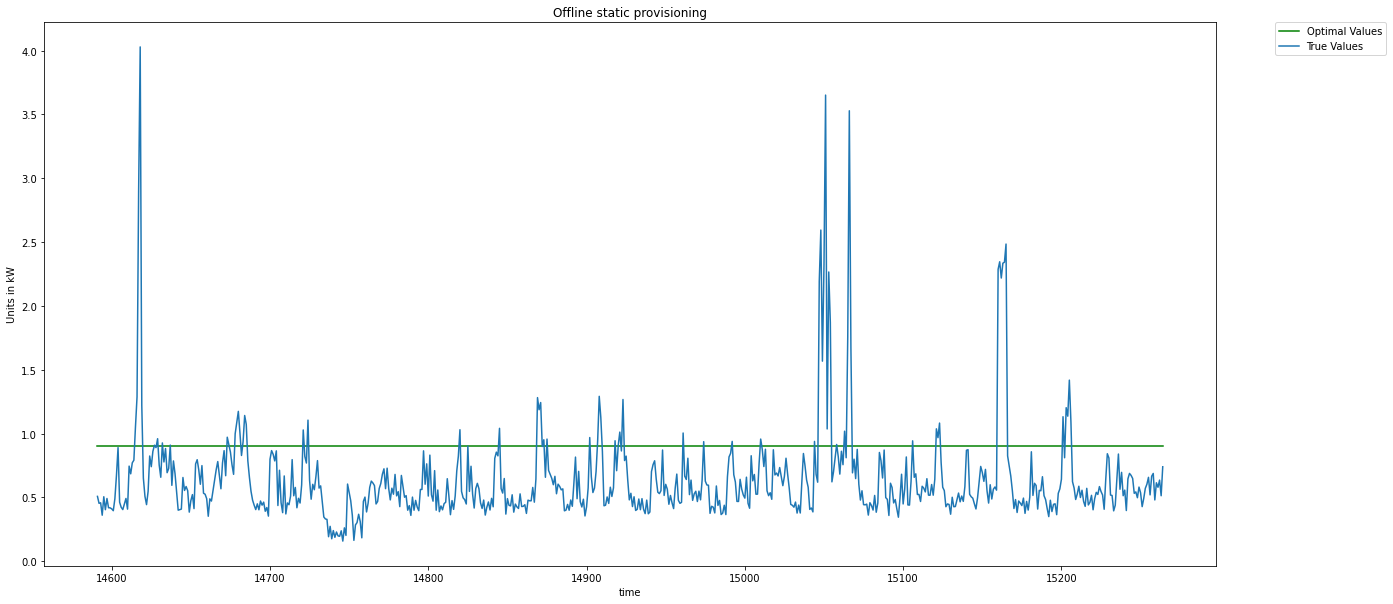

In [176]:
offline_static_provision(df_meter)

In [0]:
def offline_dynamic_provision(df):
  p = 0.4
  a = 4
  b = 4
  y = df.to_list()
  x = cp.Variable(672)
  #print(len(df))

  equation = p*x + a*cp.maximum(0, y - x) + b*x
  objective = cp.Minimize(cp.sum(equation))
  constraints = [x[0] == 0, x[1:] >= 0]
  problem = cp.Problem(objective, constraints)
  result = problem.solve()

  # Print result.
  print("\nThe optimal value is", result)
  #print("The optimal x is")
  #print(x.value)
  plot_graph_offline('dynamic', pd.Series(np.array(x.value), index=df.index))


The optimal value is 1720.84940655959


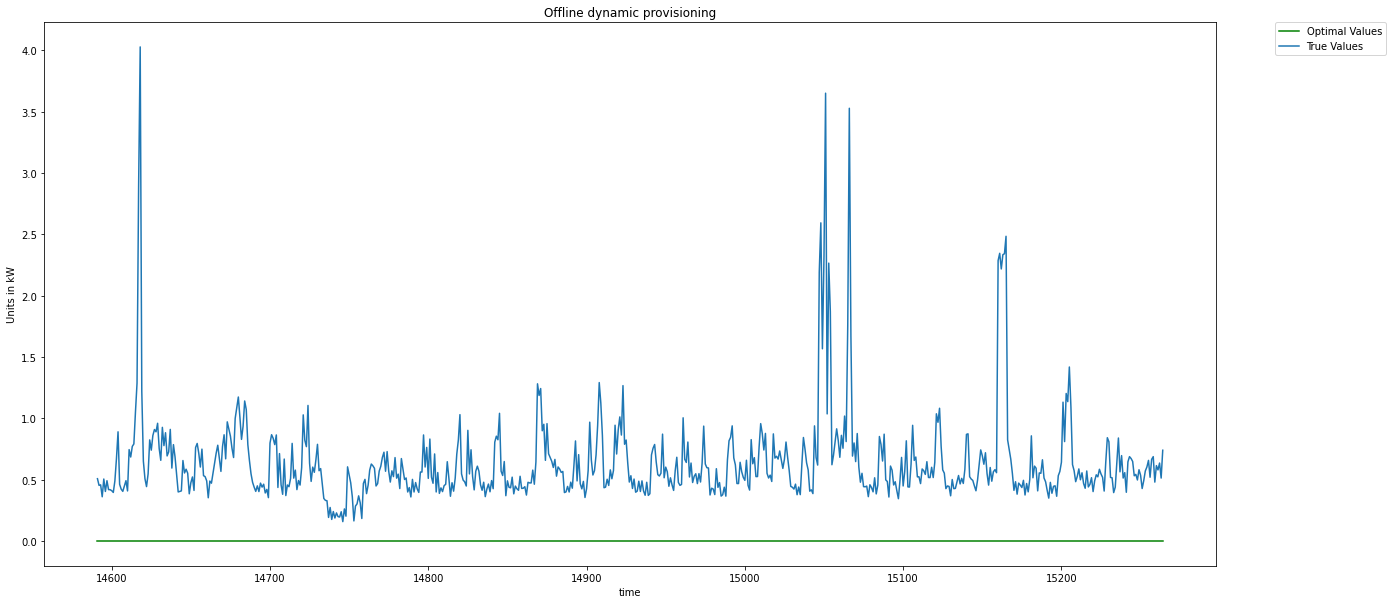

In [178]:
offline_dynamic_provision(df_meter)